# Understanding data and preparation

In [41]:
import pandas as pd

# Read the csv data and save it as an object named titanic_df
titanic_df =pd.read_csv('data/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
# Delete invalid data
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Data exploration

## Frequency analysis (univariate variable)

In [44]:
# 1) Survived Frequency
Survived_freq = titanic_df.Survived.value_counts()
print(Survived_freq)

Survived
0    549
1    342
Name: count, dtype: int64


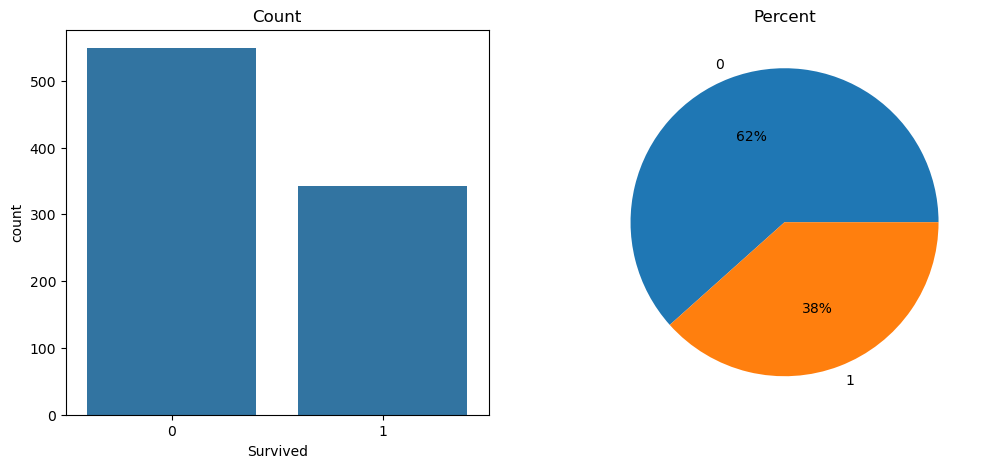

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x = 'Survived', data = titanic_df)
plt.title('Count')

plt.subplot(122)
plt.pie(Survived_freq, labels = Survived_freq.index, autopct= '%1.0f%%')
plt.title('Percent')
plt.show()

In [46]:
# 2) Pclass
Pclass_freq = titanic_df.Pclass.value_counts()
print(Pclass_freq)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


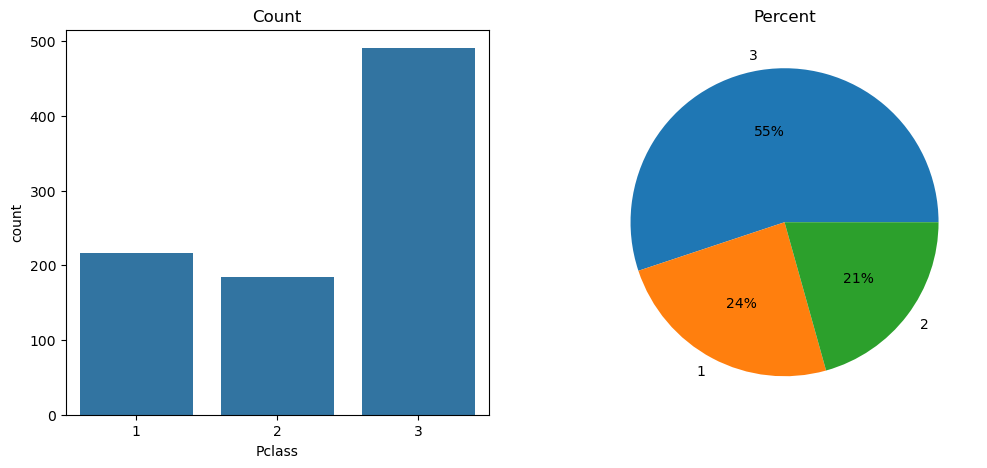

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Count')
plt.subplot(122)
plt.pie(Pclass_freq,labels=Pclass_freq.index,autopct='%1.0f%%')
plt.title('Percent')
plt.show()

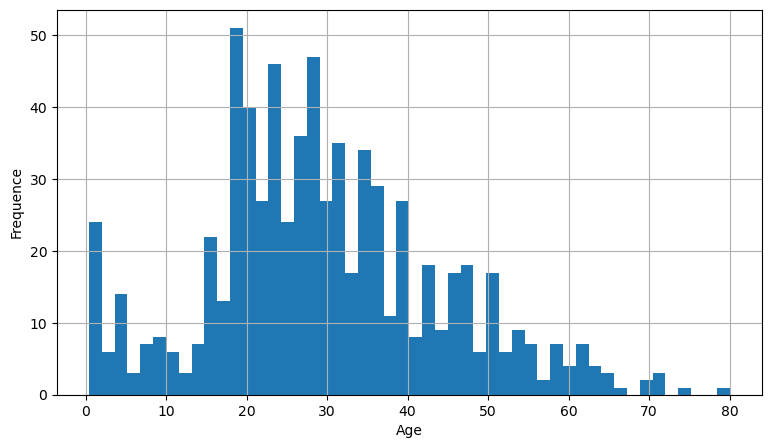

In [48]:
# Age Histogram
plt.figure(figsize=(20,5))
plt.subplot(121)
titanic_df['Age'].hist(bins = 50)

plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show()

## Descriptive statistics

In [49]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
# Custom quantile
titanic_df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], numeric_only = True)

,Survived,Pclass,Age,SibSp,Parch,Fare
0.1,0.0,1.0,14.0,0.0,0.0,7.5500
0.2,0.0,1.0,19.0,0.0,0.0,7.8542
0.3,0.0,2.0,22.0,0.0,0.0,8.0500
0.4,0.0,2.0,25.0,0.0,0.0,10.5000
0.5,0.0,3.0,28.0,0.0,0.0,14.4542
0.6,0.0,3.0,31.8,0.0,0.0,21.6792
0.7,1.0,3.0,36.0,1.0,0.0,27.0000
0.8,1.0,3.0,41.0,1.0,1.0,39.6875
0.9,1.0,3.0,50.0,1.0,2.0,77.9583
1.0,1.0,3.0,80.0,8.0,6.0,512.3292


## Multivariate exploration

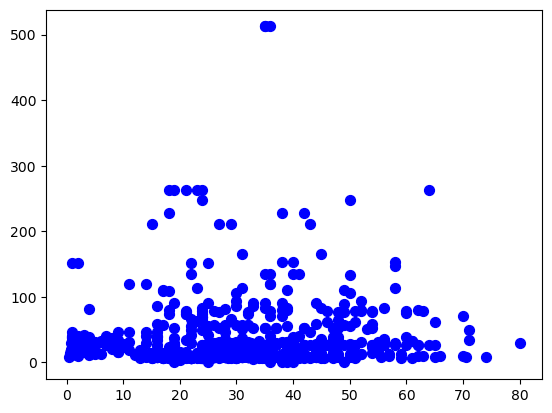

In [51]:
import matplotlib.pyplot as plt
plt.scatter(titanic_df.Age, titanic_df.Fare, 50, "blue")
plt.show()

In [52]:
# crosstab
pd.crosstab(titanic_df.Survived, titanic_df.Pclass, margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [53]:
#Contingency table of Survived VS Pclass, with percentages displayed in the cells
pd.crosstab(titanic_df.Survived, titanic_df.Pclass).apply(lambda r: r/r.sum(), axis = 1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953


# Data preprocessing

In [54]:
dropna = titanic_df.dropna()
dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Sex       183 non-null    object 
 3   Age       183 non-null    float64
 4   SibSp     183 non-null    int64  
 5   Parch     183 non-null    int64  
 6   Fare      183 non-null    float64
 7   Cabin     183 non-null    object 
 8   Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 14.3+ KB


In [55]:
# Remove the missing values from the Age variable and save it as a new variable.
Age_dropna = titanic_df[['Age']].dropna()
Age_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [56]:
# Construct missing value indicator variables
titanic_df['Age_isna']=0
# When there is a missing value, Age_isna = 1; otherwise, it is 0.
titanic_df.loc[titanic_df['Age'].isnull(), 'Age_isna'] = 1

titanic_df['Age_isna'].value_counts()

Age_isna
0    714
1    177
Name: count, dtype: int64

In [57]:
# Replace missing values
age_mean = round(titanic_df['Age'].mean())
titanic_df['Age'].fillna(age_mean, inplace=True)
titanic_df.Age.describe()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6240\2494819422.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(age_mean, inplace=True)


count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
# Perform one-hot encoding again on categorical variables
Pclass_onehot = pd.get_dummies(titanic_df.Pclass, prefix = 'Pclass').astype(int)
Pclass_onehot.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [59]:
# Continuous variable binning: Custom binning
cut_points = [0,18,25,40,60,100]
titanic_df["Age_bin"] = pd.cut(titanic_df.Age, bins=cut_points)
titanic_df["Age_bin"].value_counts()

Age_bin
(25, 40]     440
(18, 25]     162
(0, 18]      139
(40, 60]     128
(60, 100]     22
Name: count, dtype: int64

In [60]:
# Equal-width binning
titanic_df["Age_wbin"] = pd.cut(titanic_df.Age, 10)
titanic_df["Age_wbin"].value_counts()

Age_wbin
(24.294, 32.252]    346
(16.336, 24.294]    177
(32.252, 40.21]     118
(40.21, 48.168]      70
(0.34, 8.378]        54
(8.378, 16.336]      46
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: count, dtype: int64

In [61]:
# One-hot encoding is performed on the binned variables
Age_bin_onehot = pd.get_dummies(titanic_df.Age_bin, prefix='Age_bin', dtype = int)
Age_bin_onehot.head()

,"Age_bin_(0, 18]","Age_bin_(18, 25]","Age_bin_(25, 40]","Age_bin_(40, 60]","Age_bin_(60, 100]"
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [62]:
# Standardize
from sklearn import preprocessing

# tips: It is necessary to use titanic_df[['Age']], and the result obtained is a dataframe.
titanic_df['Age_std'] = preprocessing.scale(titanic_df[['Age']])
titanic_df['Age_std'].head()

0   -0.597055
1    0.634162
2   -0.289251
3    0.403309
4    0.403309
Name: Age_std, dtype: float64

In [63]:
# Normalization
minmaxscaler = preprocessing.MinMaxScaler()
minmaxscaler.fit(titanic_df[['Age']])
titanic_df['Age_normal'] = minmaxscaler.transform(titanic_df[['Age']])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_std,Age_normal
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]",-0.597055,0.271174
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]",0.634162,0.472229
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]",-0.289251,0.321438
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531


## Data object concatenation

In [64]:
titanic_df_merge = pd.concat([titanic_df, Pclass_onehot], axis = 1)
titanic_df_merge.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_isna,Age_bin,Age_wbin,Age_std,Age_normal,Pclass_1,Pclass_2,Pclass_3
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,"(18, 25]","(16.336, 24.294]",-0.597055,0.271174,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0,"(25, 40]","(32.252, 40.21]",0.634162,0.472229,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,"(25, 40]","(24.294, 32.252]",-0.289251,0.321438,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531,1,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531,0,0,1


In [65]:
# All data processing
titanic_df = titanic_df.drop(['Cabin'], axis = 1)

In [71]:
titanic_df['AgeIsMissing'] = 0
titanic_df.loc[titanic_df['Age'].isnull(), 'AgeIsMissing'] = 1

titanic_df['Embarked'].fillna('S', inplace = True)

titanic_df["FareBin"] = pd.qcut(titanic_df.Fare, 5)

titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

titanic_df['IsMother'] = 0
titanic_df.loc[(titanic_df['Sex']=='female') & (titanic_df['Parch']>0) & (titanic_df['Age']>20), 'IsMother'] = 1

titanic_df['SexAgeCombo'] = titanic_df['Sex'] + "_" + titanic_df['Age_bin'].astype(str)

Pclass = pd.get_dummies(titanic_df.Pclass,prefix='Pclass')
AgeBin = pd.get_dummies(titanic_df.Age_bin,prefix='AgeBin')
Sex = pd.get_dummies(titanic_df.Sex,prefix='Sex')
Embarked = pd.get_dummies(titanic_df.Embarked,prefix='Embarked')
FareBin = pd.get_dummies(titanic_df.FareBin,prefix='FareBin')
FamilySize = pd.get_dummies(titanic_df.FamilySize,prefix='FamilySize')
SexAgeCombo = pd.get_dummies(titanic_df.SexAgeCombo,prefix='SexAgeCombo')
# Concatenate all variables
TrainData = pd.concat([titanic_df[['Survived','AgeIsMissing','IsAlone','IsMother']],
                       Pclass,Sex,Embarked,AgeBin,FareBin,FamilySize,SexAgeCombo], axis = 1).astype(int)
# Descriptive statistics
TrainData.describe().transpose()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6240\3889856799.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna('S', inplace = True)


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
AgeIsMissing,891.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
IsAlone,891.0,0.602694,0.489615,0.0,0.0,1.0,1.0,1.0
IsMother,891.0,0.084175,0.277806,0.0,0.0,0.0,0.0,1.0
Pclass_1,891.0,0.242424,0.428790,0.0,0.0,0.0,0.0,1.0
Pclass_2,891.0,0.206510,0.405028,0.0,0.0,0.0,0.0,1.0
Pclass_3,891.0,0.551066,0.497665,0.0,0.0,1.0,1.0,1.0
Sex_female,891.0,0.352413,0.477990,0.0,0.0,0.0,1.0,1.0
Sex_male,891.0,0.647587,0.477990,0.0,0.0,1.0,1.0,1.0
Embarked_C,891.0,0.188552,0.391372,0.0,0.0,0.0,0.0,1.0


# Model training

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

trainData_X = TrainData.drop(['Survived'], axis = 1)
trainData_y = TrainData.Survived

X_train, X_test, y_train, y_test = train_test_split(trainData_X, trainData_y, test_size=0.3, random_state=123456)

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       166
           1       0.70      0.72      0.71       102

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# Make predictions on new data

## Perform the same data preprocessing on the new data

In [74]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_isna,Age_bin,Age_wbin,Age_std,Age_normal,AgeIsMissing,FareBin,FamilySize,IsAlone,IsMother,SexAgeCombo
0,0,3,male,22.0,1,0,7.2500,S,0,"(18, 25]","(16.336, 24.294]",-0.597055,0.271174,0,"(-0.001, 7.854]",2,0,0,"male_(18, 25]"
1,1,1,female,38.0,1,0,71.2833,C,0,"(25, 40]","(32.252, 40.21]",0.634162,0.472229,0,"(39.688, 512.329]",2,0,0,"female_(25, 40]"
2,1,3,female,26.0,0,0,7.9250,S,0,"(25, 40]","(24.294, 32.252]",-0.289251,0.321438,0,"(7.854, 10.5]",1,1,0,"female_(25, 40]"
3,1,1,female,35.0,1,0,53.1000,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531,0,"(39.688, 512.329]",2,0,0,"female_(25, 40]"
4,0,3,male,35.0,0,0,8.0500,S,0,"(25, 40]","(32.252, 40.21]",0.403309,0.434531,0,"(7.854, 10.5]",1,1,0,"male_(25, 40]"


In [81]:
titanic_df = pd.read_csv('data/test.csv')
# drop掉Name,Ticket,Cabin
titanic_df = titanic_df.drop(['Name','Ticket','Cabin'], axis = 1)
# 构造一个新变量AgeIsMissing
titanic_df['AgeIsMissing'] = 0
titanic_df.loc[titanic_df['Age'].isnull(), 'AgeIsMissing'] = 1
# 对Age缺失值进行均值填充
age_mean = round(titanic_df['Age'].mean())
titanic_df['Age'].fillna(age_mean, inplace=True)
# 对Embarked缺失值用'S'替换
titanic_df['Embarked'].fillna('S', inplace=True)
# 对Age进行分箱--自定义分箱
cut_points = [0,18,25,40,60,100]
titanic_df["AgeBin"] = pd.cut(titanic_df.Age, bins=cut_points)
# 对Fare船票价格进行分箱--等深分箱 
### fix：要指定一样的分箱区间，不然标签不匹配
fare_bins = [-0.001, 7.854, 10.5, 21.679, 39.688, 512.329]
titanic_df["FareBin"] = pd.cut(titanic_df.Fare, bins=fare_bins)
# 构造FamilySize变量
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
# 构造一个新变量IsAlone（是否独自一人)
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1
# 构造一个新变量IsMother（是否是母亲）
titanic_df['IsMother'] = 0
titanic_df.loc[(titanic_df['Sex']=='female') & (titanic_df['Parch']>0) & (titanic_df['Age']>20), 'IsMother'] = 1
# 把Sex性别和AgeBin特征进行组合
titanic_df['SexAgeCombo'] = titanic_df['Sex'] + "_" + titanic_df['AgeBin'].astype(str)
# 对Pclass,Sex,Embarked,AgeBin,FareBin,FamilySize,Sex_Age_combo进行独热编码
Pclass = pd.get_dummies(titanic_df.Pclass,prefix='Pclass')
Sex = pd.get_dummies(titanic_df.Sex,prefix='Sex')
Embarked = pd.get_dummies(titanic_df.Embarked,prefix='Embarked')
AgeBin = pd.get_dummies(titanic_df.AgeBin,prefix='AgeBin')
FareBin = pd.get_dummies(titanic_df.FareBin,prefix='FareBin')
FamilySize = pd.get_dummies(titanic_df.FamilySize,prefix='FamilySize')
SexAgeCombo = pd.get_dummies(titanic_df.SexAgeCombo,prefix='SexAgeCombo')
# 把需要的变量全部拼接在一起
TestData = pd.concat([titanic_df[['PassengerId','AgeIsMissing','IsAlone','IsMother']],
                      Pclass,Sex,Embarked,AgeBin,FareBin,FamilySize,SexAgeCombo],axis=1).astype(int)
TestData.describe().transpose()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6240\846616645.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(age_mean, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6240\846616645.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.0,996.25,1100.5,1204.75,1309.0
AgeIsMissing,418.0,0.205742,0.404727,0.0,0.00,0.0,0.00,1.0
IsAlone,418.0,0.605263,0.489380,0.0,0.00,1.0,1.00,1.0
IsMother,418.0,0.086124,0.280884,0.0,0.00,0.0,0.00,1.0
Pclass_1,418.0,0.255981,0.436934,0.0,0.00,0.0,1.00,1.0
Pclass_2,418.0,0.222488,0.416416,0.0,0.00,0.0,0.00,1.0
Pclass_3,418.0,0.521531,0.500135,0.0,0.00,1.0,1.00,1.0
Sex_female,418.0,0.363636,0.481622,0.0,0.00,0.0,1.00,1.0
Sex_male,418.0,0.636364,0.481622,0.0,0.00,1.0,1.00,1.0
Embarked_C,418.0,0.244019,0.430019,0.0,0.00,0.0,0.00,1.0


## Use the trained model to make predictions on new data

In [82]:
Test_X = TestData.drop(['PassengerId'], axis = 1)

pred = lr.predict(Test_X)

Submission = pd.DataFrame({'PassengerId': TestData.PassengerId, 'Survived': pred})

In [83]:
# Generate the submission result and save it
Submission.to_csv("Submission.csv", index=False)
submission_df = pd.read_csv('Submission.csv')
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## The prediction results are saved as a file

In [85]:
# pickle模块可以对任何对象进行序列化并保存到磁盘中，并在需要的时候读取出来
# 通过pickle.dump()方法把模型保存为文件，通过pickle.load()方法把模型读取（加载）出来

#记得先要导入pickle模块：
import pickle
# 确认一下lr是我们训练好的逻辑回归模型 :
# sklearn.linear_model.logistic.LogisticRegression
type(lr)
# 通过pickle.dump()把lr模型保存为lrmodel.pickle文件
with open('lrmodel.pickle', 'wb') as fw:
    pickle.dump(lr, fw)